#Importing Libraries and Loading Data

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the datasets
books = pd.read_csv('/content/Books.csv', encoding='latin-1')
users = pd.read_csv('/content/Users.csv', encoding='latin-1')
ratings = pd.read_csv('/content/Ratings.csv', encoding='latin-1')
'''this line of code tells Python to read the CSV file assuming its
contents are encoded using the 'latin-1' standard.
This ensures that the data is loaded correctly and can be properly interpreted by the program.
'''
#Displaying first few rows to confirm
print("Books:")
print(books.head())
print("\nUsers:")
print(users.head())
print("\nRatings:")
print(ratings.head())

Books:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amaz

#Data Cleaning and Preprocessing

In [ ]:
#printing the column names to check
print("Books columns:", books.columns)
print("Users columns:", users.columns)
print("Ratings columns:", ratings.columns)

Books columns: Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Users columns: Index(['User-ID', 'Location', 'Age'], dtype='object')
Ratings columns: Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [ ]:
#Renaming Columns
# Rename columns in all datasets
books.rename(columns={
    'ISBN': 'isbn',
    'Book-Title': 'book_title',
    'Book-Author': 'book_author',
    'Year-Of-Publication': 'year_of_publication',
    'Publisher': 'publisher'
}, inplace=True)

users.rename(columns={
    'User-ID': 'user_id',
    'Location': 'location',
    'Age': 'age'
}, inplace=True)

ratings.rename(columns={
    'User-ID': 'user_id',
    'ISBN': 'isbn',
    'Book-Rating': 'book_rating'
}, inplace=True)

#printing the column names again to check
print("Books columns:", books.columns)
print("Users columns:", users.columns)
print("Ratings columns:", ratings.columns)

Books columns: Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Users columns: Index(['user_id', 'location', 'age'], dtype='object')
Ratings columns: Index(['user_id', 'isbn', 'book_rating'], dtype='object')


In [ ]:
#Basic Cleaning of each dataset
#Book
# Filling missing publisher names with 'Unknown'
books['publisher'] = books['publisher'].fillna('Unknown Publisher')


# Fixing year values: Removing years that are unrealistic
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')
books = books[(books['year_of_publication'] >= 1900) & (books['year_of_publication'] <= 2023)]

#Users: Removing unrealistic ages
users['age'] = pd.to_numeric(users['age'], errors='coerce')
users = users[(users['age'] >= 5) & (users['age'] <= 100)]

# Removing implicit ratings (if rating is 0, it usually means not rated)
ratings = ratings[ratings['book_rating'] > 0]

#Exploratory Data Analysis

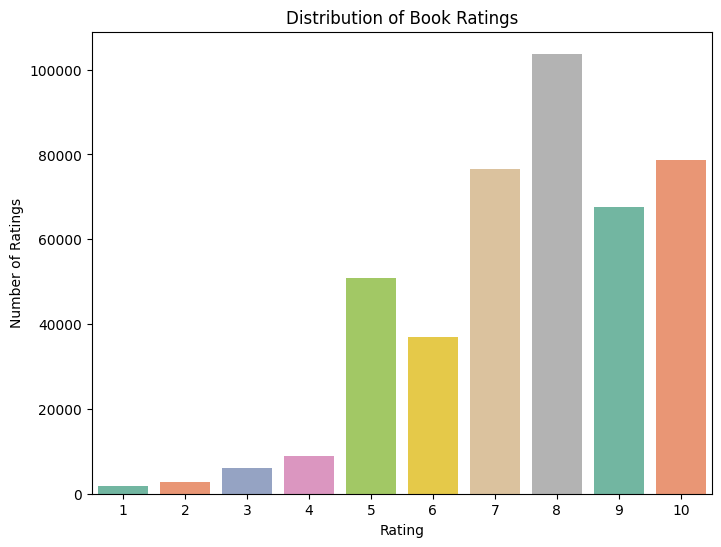

In [ ]:
#Univariate Analysis : analyzing one variable at a time.

#Distribution of Book Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x= 'book_rating', hue='book_rating', data=ratings, palette = 'Set2', legend = False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()
#Insight: This helps identify skewness in rating patterns (e.g., mostly high ratings).


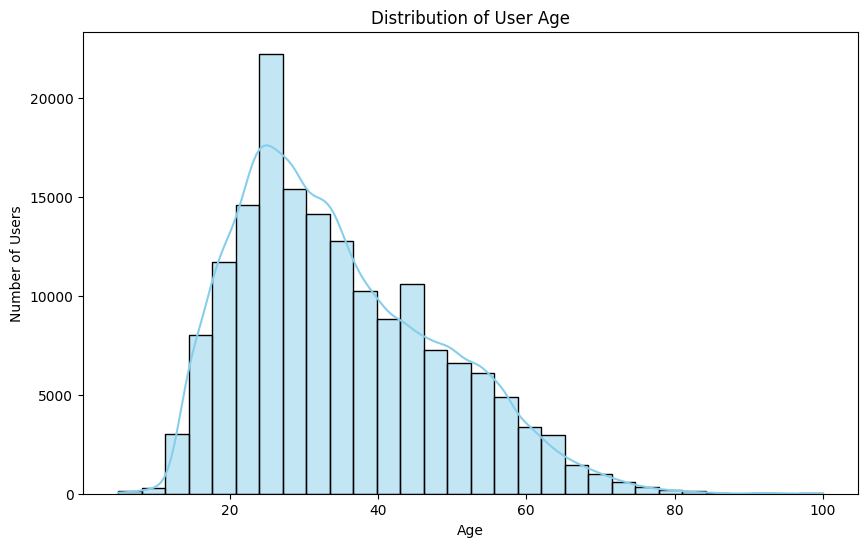

In [ ]:
# Age Distribution of Users
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()
#Insight: Identifies common age groups of users and helps remove outliers if needed.

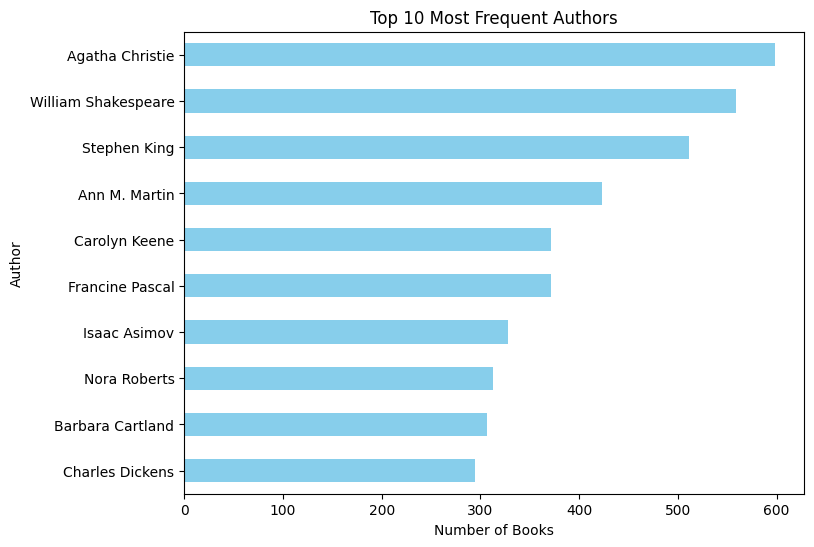

In [ ]:
#Code for Top Authors:
top_authors = books['book_author'].value_counts().head(10)
top_authors.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Top 10 Most Frequent Authors')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.show()

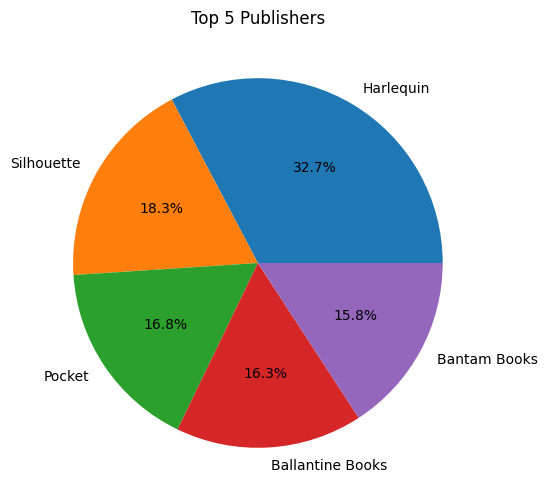

In [ ]:
#Top 5 publishers
top_publishers = books['publisher'].value_counts().head(5)
top_publishers.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Top 5 Publishers')
plt.ylabel('')
plt.show()

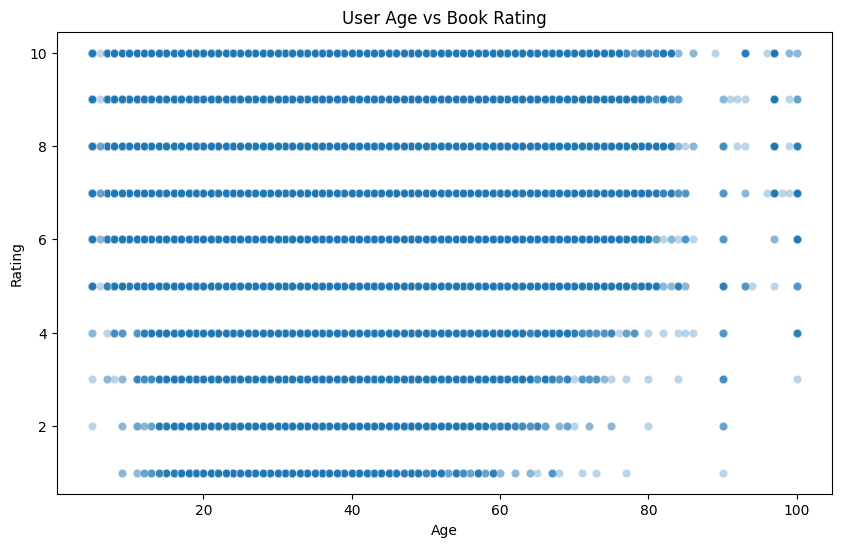

In [ ]:
#Bivariate Analysis
#User Age vs Book Rating
merged_df = ratings.merge(users, on='user_id')

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='book_rating', data=merged_df, alpha=0.3)
plt.title('User Age vs Book Rating')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()
#Insight: Helps understand how user age correlates with rating patterns.



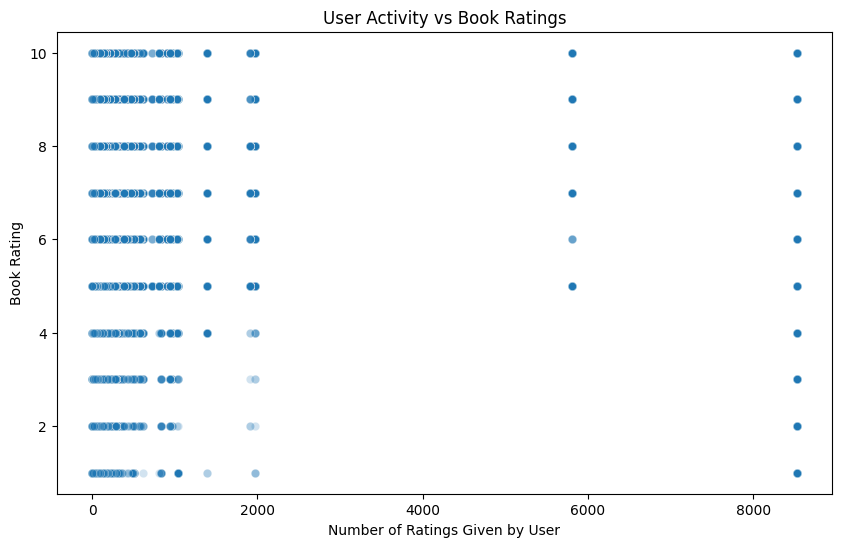

In [ ]:
#User Activity vs Rating Behavior
user_activity = ratings.groupby('user_id')['book_rating'].count().reset_index()
user_activity.columns = ['user_id', 'num_ratings']

merged_activity = ratings.merge(user_activity, on='user_id')

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_activity, x='num_ratings', y='book_rating', alpha=0.2)
plt.title('User Activity vs Book Ratings')
plt.xlabel('Number of Ratings Given by User')
plt.ylabel('Book Rating')
plt.show()


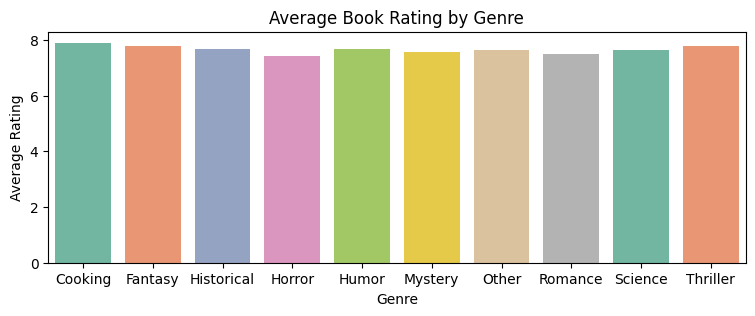

In [ ]:
#Genre Popularity vs Rating Scores
def extract_genre(title):
    title = title.lower()
    if 'mystery' in title or 'detective' in title:
        return 'Mystery'
    elif 'romance' in title or 'love' in title:
        return 'Romance'
    elif 'fantasy' in title or 'magic' in title or 'Harry' in title:
        return 'Fantasy'
    elif 'thriller' in title or 'secret' in title:
        return 'Thriller'
    elif 'Think' in title or 'Peace' in title:
        return 'Self - Help'
    elif 'humor' in title or 'laugh' in title:
        return 'Humor'
    elif 'historical' in title or 'Nation' in title or 'history' in title:
        return 'Historical'
    elif 'horror' in title or 'Ghost' in title:
        return 'Horror'
    elif 'science' in title or 'space' in title or 'time' in title:
        return 'Science'
    elif 'cook' in title or 'food' in title:
        return 'Cooking'
    else:
        return 'Other'

books['genre'] = books['book_title'].apply(extract_genre)

# Merge ratings with books
merged_genre = ratings.merge(books, on='isbn')

# Average rating by genre
genre_avg = merged_genre.groupby('genre')['book_rating'].mean().reset_index()

# Plot
plt.figure(figsize=(9,3))
sns.barplot(data=genre_avg, x='genre', y='book_rating', hue='genre', palette='Set2', legend=False)
plt.title('Average Book Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()
#Insight: Shows which genres tend to receive higher ratings but almost all genre have similar ratings

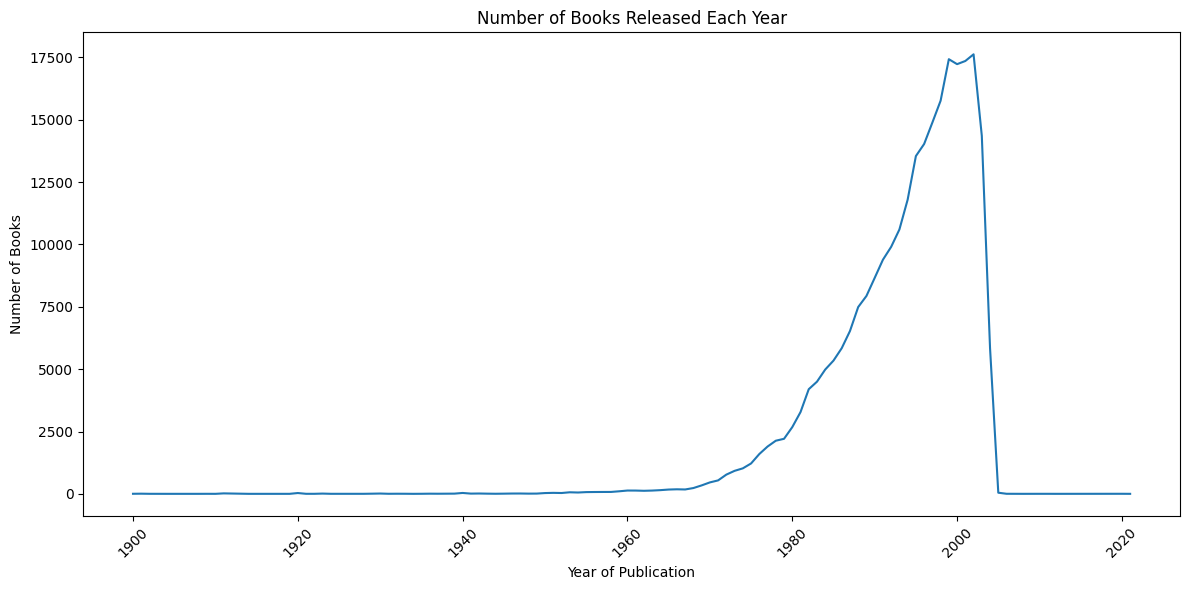

In [ ]:
#Shows the number of books released per year.
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of books released each year
yearly_release = books['year_of_publication'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_release.index, y=yearly_release.values)
plt.title('Number of Books Released Each Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


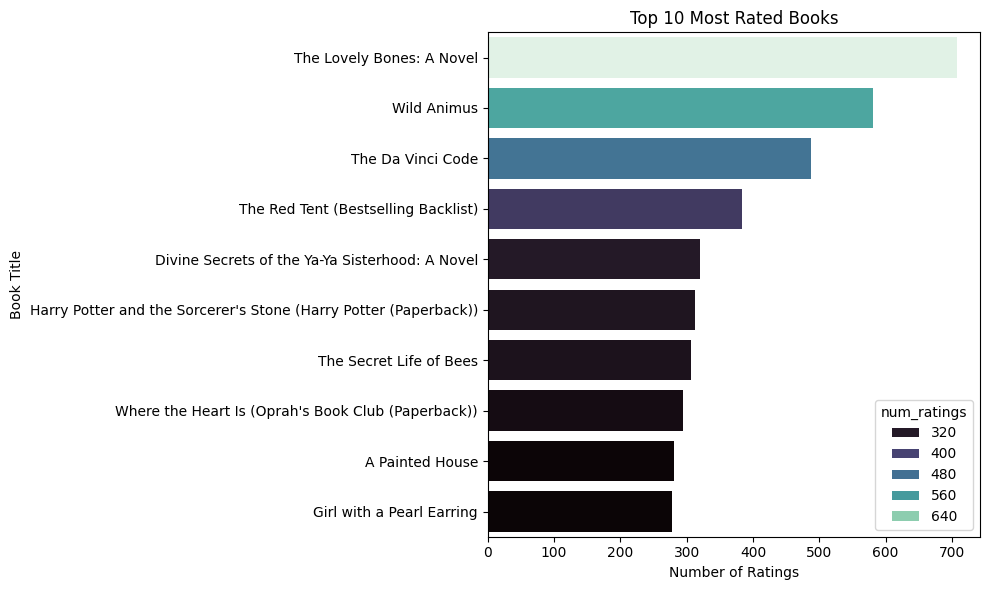

In [ ]:
# Top 10 Most Rated Books
top_books = ratings['isbn'].value_counts().head(11).reset_index()
top_books.columns = ['isbn', 'num_ratings']

# Merge with book titles
top_books = top_books.merge(books[['isbn', 'book_title']], on='isbn', how='left')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y='book_title', x='num_ratings', hue = 'num_ratings', data=top_books, palette='mako')
plt.title('Top 10 Most Rated Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


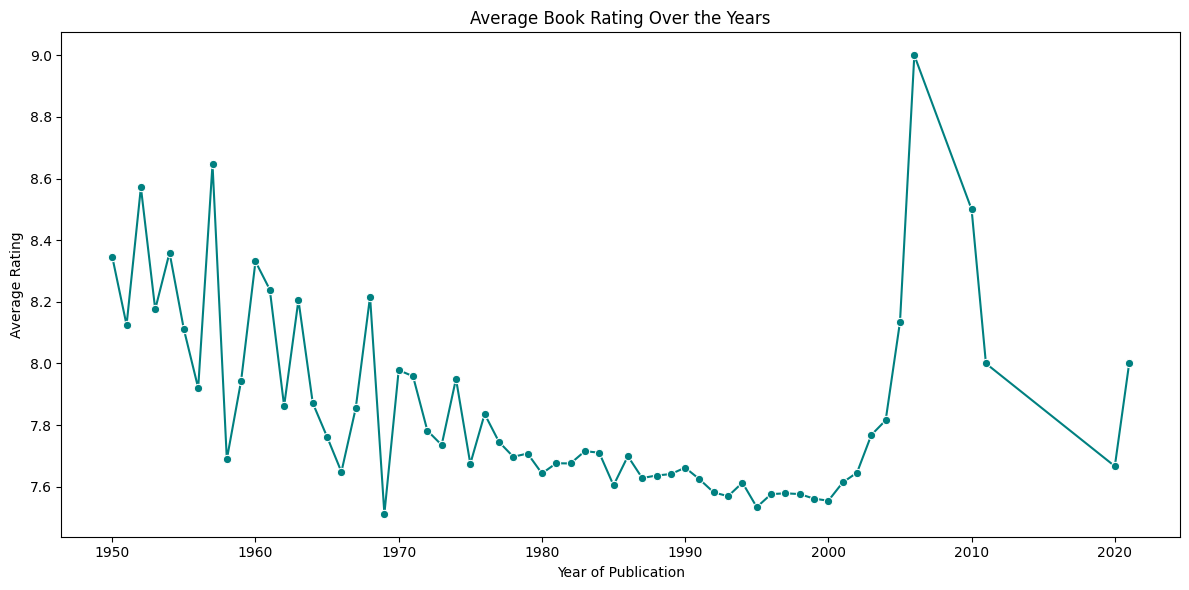

In [ ]:
#Ratings vs Year of Publication:
# Merging ratings with book year info
ratings_year = ratings.merge(books[['isbn', 'year_of_publication']], on='isbn', how='left')

# Step 1: Removing invalid year entries
# Convert to numeric, coercing errors (e.g., 'DK Pub' → NaN)
ratings_year['year_of_publication'] = pd.to_numeric(ratings_year['year_of_publication'], errors='coerce')

# Step 2: Filtering years within realistic bounds (e.g., 1950–2023)
ratings_year = ratings_year[(ratings_year['year_of_publication'] >= 1950) & (ratings_year['year_of_publication'] <= 2023)]

# Step 3: Grouping by year and calculate average rating
yearly_avg = ratings_year.groupby('year_of_publication')['book_rating'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='year_of_publication', y='book_rating', marker='o', color='teal')
plt.title('Average Book Rating Over the Years')
plt.xlabel('Year of Publication')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


#Outlier Treatment

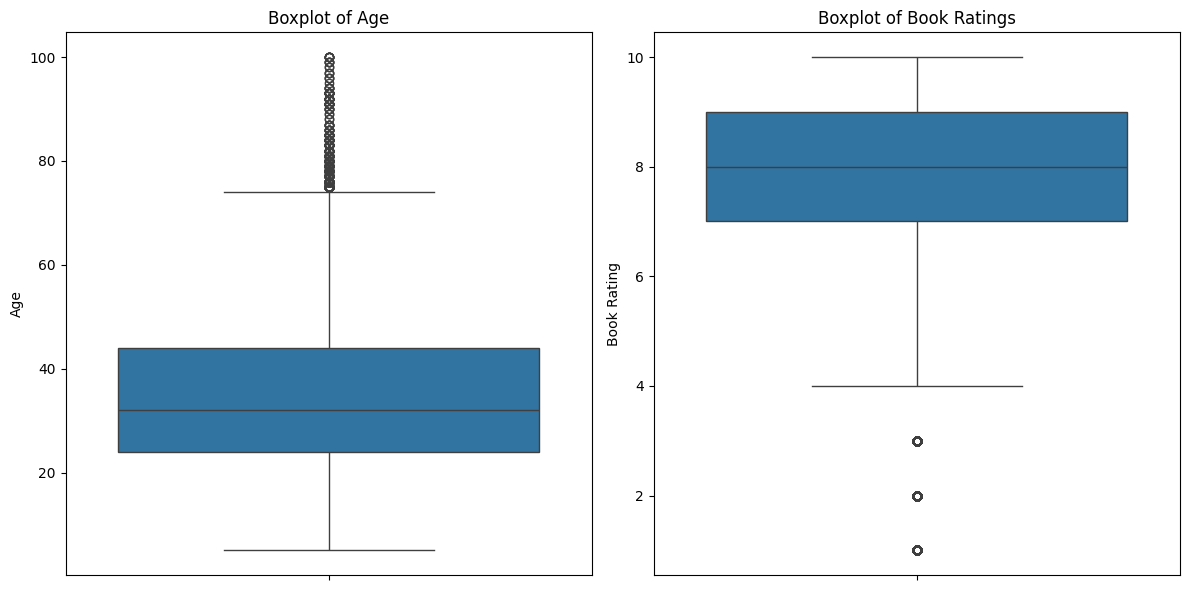

Outliers in Age: 220       79.0
689       80.0
957       78.0
1147      79.0
1485      75.0
          ... 
277558    98.0
278317    77.0
278348    76.0
278412    76.0
278471    81.0
Name: age, Length: 718, dtype: float64
Outliers in Book-Rating: 3          3
49         3
241        1
304        3
310        3
          ..
1149492    3
1149555    1
1149568    2
1149690    2
1149717    2
Name: book_rating, Length: 10525, dtype: int64


In [ ]:
# prompt: create a boxplot for Outliers for continous variables like age and ratings use iqr methos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'users' DataFrame has 'Age' and 'ratings' DataFrame has 'Book-Rating'
# Replacing with your actual DataFrames and column names

def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers for Age
outliers_age = find_outliers_iqr(users['age'])

# Detect outliers for Book-Rating
outliers_rating = find_outliers_iqr(ratings['book_rating'])

# Create boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=users['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=ratings['book_rating'])
plt.title('Boxplot of Book Ratings')
plt.ylabel('Book Rating')

plt.tight_layout()
plt.show()

print("Outliers in Age:", outliers_age)
print("Outliers in Book-Rating:", outliers_rating)


In [ ]:
# IQR treatment for age
Q1 = users['age'].quantile(0.25)
Q3 = users['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

users = users[(users['age'] >= lower) & (users['age'] <= upper)]


#Variable Transfromation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
genre_matrix = tfidf.fit_transform(books['genre'].fillna(''))


#Addition of New Variables

In [ ]:
# Book Popularity Score: number of ratings per book
book_popularity = ratings.groupby('isbn')['book_rating'].count().reset_index()
book_popularity.columns = ['isbn', 'popularity_score']

# Merging popularity score back to books
# Ensuring the 'isbn' column is still in 'books' before this merge
books = books.merge(book_popularity, on='isbn', how='left')
books['popularity_score'] = books['popularity_score'].fillna(0)


In [ ]:
# Counting how many books each user has rated
user_activity = ratings.groupby('user_id')['book_rating'].count().reset_index()
user_activity.columns = ['user_id', 'num_ratings']

# Categorizing users based on their activity level
def activity_level(count):
    if count < 20:
        return 'Low'
    elif 20 <= count <= 50:
        return 'Medium'
    else:
        return 'High'

user_activity['activity_level'] = user_activity['num_ratings'].apply(activity_level)

# Merging with users dataframe
users = users.merge(user_activity, on='user_id', how='left')


# Recommendation System - Content Based Filtering

> Content-Based Filtering:
building a model that recommends books based on their content (title, author, genre, etc.) using cosine similarity and TF-IDF.




To optimize memory usage and processing efficiency in Google Colab, we focused on the top 10K most-rated books for content-based filtering. This subset still captures the most popular and diverse titles, ensuring reliable recommendations while maintaining scalability.

In [ ]:
!pip install fuzzywuzzy python-Levenshtein

In [ ]:
# Imports
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from fuzzywuzzy import process
import warnings
warnings.filterwarnings("ignore")

# Step 1: Filtering Top 1000 Most Rated Books
top_books = ratings['isbn'].value_counts().head(1000).index
filtered_books = books[books['isbn'].isin(top_books)].copy()

# Step 2: Filling Missing Values
filtered_books['book_author'] = filtered_books['book_author'].fillna('')
filtered_books['genre'] = filtered_books['genre'].fillna('')
filtered_books['book_title'] = filtered_books['book_title'].fillna('')

# Step 3: Adding Popularity Score
book_popularity = ratings.groupby('isbn')['book_rating'].count().reset_index()
book_popularity.columns = ['isbn', 'popularity_score']
print("Columns of book_popularity before merge:", book_popularity.columns) # Debug print
filtered_books = filtered_books.merge(book_popularity, on='isbn', how='left')
print("Columns of filtered_books after merge:", filtered_books.columns) # Debug print

filtered_books = filtered_books.drop(columns=['popularity_score'], errors='ignore')
filtered_books = filtered_books.merge(book_popularity, on='isbn', how='left')
filtered_books['popularity_score'] = filtered_books['popularity_score'].fillna(0).astype(int)


# Step 4: Cleaning and Combine Features
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # remove numbers/special chars
    return text.lower().strip()

filtered_books['combined_features'] = (
    filtered_books['book_title'].apply(clean_text) + ' ' +
    filtered_books['book_author'].apply(clean_text) + ' ' +
    filtered_books['genre'].apply(clean_text)
)

# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(filtered_books['combined_features'])

# Step 6: Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 7: Create Reverse Index
indices = pd.Series(filtered_books.index, index=filtered_books['book_title'].str.lower()).drop_duplicates()

# Step 8: Recommendation Function with Fuzzy Matching + Genre/Popularity + Similarity Score
def recommend_books(title, cosine_sim=cosine_sim, top_n=5):
    title = title.lower().strip()

    # Fuzzy matching for best match
    all_titles = indices.index.tolist()
    best_match, score = process.extractOne(title, all_titles)
    if score < 60:
        print("Book not found or not in the top rated books.")
        return

    idx = indices[best_match]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]  # top N recommendations

    book_indices = [i[0] for i in sim_scores]
    results = filtered_books.iloc[book_indices][['book_title', 'book_author', 'genre', 'popularity_score']]
    results = results.copy()
    results['similarity_score'] = [round(sim_scores[i][1], 3) for i in range(len(sim_scores))]

    print(f"\nTop {top_n} Recommendations for: 📘 {filtered_books.loc[idx, 'book_title']}")
    print("------------------------------------------------------------")
    for i, row in results.iterrows():
        print(f"🔹 {row['book_title']} by {row['book_author']} | Genre: {row['genre']} | Popularity: {row['popularity_score']} | Score: {row['similarity_score']}")
    return results

# ✅ Example
recommend_books("The Hobbit")

Columns of book_popularity before merge: Index(['isbn', 'popularity_score'], dtype='object')
Columns of filtered_books after merge: Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'genre',
       'popularity_score_x', 'popularity_score_y'],
      dtype='object')

Top 5 Recommendations for: 📘 The Hobbit: or There and Back Again
------------------------------------------------------------
🔹 The Hobbit : The Enchanting Prelude to The Lord of the Rings by J.R.R. TOLKIEN | Genre: Other | Popularity: 161 | Score: 0.634
🔹 The Two Towers (The Lord of the Rings, Part 2) by J.R.R. TOLKIEN | Genre: Other | Popularity: 83 | Score: 0.469
🔹 The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN | Genre: Other | Popularity: 77 | Score: 0.457
🔹 The Fellowship of the Ring (The Lord of the Rings, Part 1) by J.R.R. TOLKIEN | Genre: Other | Popularity: 131 | Score: 0.425
🔹 The Lord of the Rings (Movie Art

,book_title,book_author,genre,popularity_score,similarity_score
428,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,Other,161,0.634
137,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Other,83,0.469
497,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,Other,77,0.457
248,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Other,131,0.425
634,The Lord of the Rings (Movie Art Cover),J.R.R. Tolkien,Other,38,0.387


In [ ]:
#Testing
recommend_books('The Two Towers (The Lord of the Rings, Part 2)')


Top 5 Recommendations for: 📘 The Two Towers (The Lord of the Rings, Part 2)
------------------------------------------------------------
🔹 The Return of the King (The Lord of the Rings, Part 3) by J.R.R. TOLKIEN | Genre: Other | Popularity: 77 | Score: 0.707
🔹 The Fellowship of the Ring (The Lord of the Rings, Part 1) by J.R.R. TOLKIEN | Genre: Other | Popularity: 131 | Score: 0.658
🔹 The Lord of the Rings (Movie Art Cover) by J.R.R. Tolkien | Genre: Other | Popularity: 38 | Score: 0.599
🔹 The Hobbit : The Enchanting Prelude to The Lord of the Rings by J.R.R. TOLKIEN | Genre: Other | Popularity: 161 | Score: 0.589
🔹 The Fellowship of the Ring (The Lord of the Rings, Part 1) by J. R. R. Tolkien | Genre: Other | Popularity: 43 | Score: 0.531


,book_title,book_author,genre,popularity_score,similarity_score
497,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,Other,77,0.707
248,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Other,131,0.658
634,The Lord of the Rings (Movie Art Cover),J.R.R. Tolkien,Other,38,0.599
428,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,Other,161,0.589
871,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,Other,43,0.531


In [ ]:
#Saving the model
import joblib

# Save similarity matrix and mappings
joblib.dump(cosine_sim, 'cosine_similarity_matrix.pkl')
joblib.dump(indices, 'book_title_indices.pkl')
joblib.dump(filtered_books, 'filtered_books_df.pkl')


['filtered_books_df.pkl']

In [ ]:
#To load them back
cosine_sim = joblib.load('cosine_similarity_matrix.pkl')
indices = joblib.load('book_title_indices.pkl')
filtered_books = joblib.load('filtered_books_df.pkl')


#Collaborative Filtering


> Matrix Factorization via SVD (Singular Value Decomposition)



In [ ]:
#!pip install scikit-surprise - have installed already
#!pip install numpy==1.24.4 --force-reinstall - had done this to adjust the versions

In [ ]:
#Importing
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd


# Using ratings DataFrame: user_id, isbn, book_rating
reader = Reader(rating_scale=(0, 10))  # Match your rating scale
data = Dataset.load_from_df(ratings[['user_id', 'isbn', 'book_rating']], reader)

#Preparing the data
# Using ratings DataFrame: user_id, isbn, book_rating
reader = Reader(rating_scale=(0, 10))  # Match your rating scale
data = Dataset.load_from_df(ratings[['user_id', 'isbn', 'book_rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use SVD (Singular Value Decomposition)
model = SVD()
model.fit(trainset)

# Predict on testset and evaluate
predictions = model.test(testset)
accuracy.rmse(predictions)


RMSE: 1.6406


1.640585879631453

In [ ]:
#Predictions for a Specific User
def recommend_books_collab(user_id, n=5):
    # Get books the user has already rated
    user_books = ratings[ratings['user_id'] == user_id]['isbn'].tolist()

    # Predicting ratings for books the user hasn't rated
    books_not_read = filtered_books[~filtered_books['isbn'].isin(user_books)]

    # Predicting rating for each book
    books_not_read['predicted_rating'] = books_not_read['isbn'].apply(lambda x: model.predict(user_id, x).est)

    # Sorting by predicted rating
    top_books = books_not_read.sort_values('predicted_rating', ascending=False).head(n)

    return top_books[['book_title', 'book_author', 'predicted_rating']]

In [ ]:
#Testing
print('1. \n',recommend_books_collab(1))  #user_id from dataset
recommend_books_collab(2)

1. 
                                             book_title     book_author  \
497  The Return of the King (The Lord of the Rings,...  J.R.R. TOLKIEN   
649  Harry Potter and the Prisoner of Azkaban (Book 3)   J. K. Rowling   
790     Harry Potter and the Sorcerer's Stone (Book 1)   J. K. Rowling   
756                        Dune (Remembering Tomorrow)   Frank Herbert   
196                                      Lonesome Dove  Larry McMurtry   

     predicted_rating  
497          9.047885  
649          8.959001  
790          8.945926  
756          8.904411  
196          8.847148  


,book_title,book_author,predicted_rating
497,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,9.047885
649,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,8.959001
790,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,8.945926
756,Dune (Remembering Tomorrow),Frank Herbert,8.904411
196,Lonesome Dove,Larry McMurtry,8.847148


In [ ]:
#Saving model
import joblib

# Save your SVD model
joblib.dump(model, 'svd_model.pkl')


#Hybrid Recommendation System


> A hybrid system combines the strengths of both:


*   Content-Based Filtering (built using TF-IDF and cosine similarity)
*   Collaborative Filtering (Surprise’s SVD algorithm)

In [ ]:
#Imports
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# filtered_books: DataFrame after TF-IDF
# cosine_sim: Cosine similarity matrix
# indices: pd.Series mapping book_title (lowercase) to index in filtered_books
# model: Trained Surprise SVD model
# ratings: Original ratings DataFrame (user_id, isbn, book_rating)

# Normalizing collaborative predictions and content similarity
scaler = MinMaxScaler()

#hybrid recommendation function
def hybrid_recommendations(user_id, book_title, top_n=5, content_weight=0.5, collab_weight=0.5):
    book_title = book_title.lower()

    if book_title not in indices:
        print("Book not found.")
        return pd.DataFrame()

    #index of the book
    idx = indices[book_title]

    #1.Content-based similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+20]  # Top N+ buffer
    book_indices = [i[0] for i in sim_scores]
    content_scores = np.array([x[1] for x in sim_scores]).reshape(-1, 1)

    #Normalizing content scores
    norm_content_scores = scaler.fit_transform(content_scores).flatten()

    #2.Collaborative filtering scores
    hybrid_books = filtered_books.iloc[book_indices]
    collab_scores = []

    for isbn in hybrid_books['isbn']:
        try:
            pred = model.predict(str(user_id), str(isbn))
            collab_scores.append(pred.est)
        except:
            collab_scores.append(0)  # default if user/book unseen

    #Normalizing collaborative scores
    norm_collab_scores = scaler.fit_transform(np.array(collab_scores).reshape(-1, 1)).flatten()

    #3.Weighted average score
    hybrid_score = content_weight * norm_content_scores + collab_weight * norm_collab_scores

    #Final DataFrame
    hybrid_books = hybrid_books.copy()
    hybrid_books['content_score'] = norm_content_scores
    hybrid_books['collab_score'] = norm_collab_scores
    hybrid_books['hybrid_score'] = hybrid_score

    return hybrid_books.sort_values(by='hybrid_score', ascending=False).head(top_n)[
        ['book_title', 'book_author', 'content_score', 'collab_score', 'hybrid_score']
    ]

In [ ]:
hybrid_recommendations(user_id=2, book_title="The Da Vinci Code", top_n=5)

,book_title,book_author,content_score,collab_score,hybrid_score
847,Illuminati.,Dan Brown,1.000000,0.817746,0.908873
26,Angels &amp; Demons,Dan Brown,0.817231,0.825568,0.821400
56,Deception Point,Dan Brown,0.870682,0.737125,0.803904
58,Angels &amp; Demons,Dan Brown,0.817231,0.728239,0.772735
73,Digital Fortress : A Thriller,Dan Brown,0.661093,0.736489,0.698791


from matplotlib import pyplot as plt
_df_0['content_score'].plot(kind='hist', bins=20, title='content_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['collab_score'].plot(kind='hist', bins=20, title='collab_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['hybrid_score'].plot(kind='hist', bins=20, title='hybrid_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('book_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='content_score', y='collab_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='collab_score', y='hybrid_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['content_score'].plot(kind='line', figsize=(8, 4), title='content_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['collab_score'].plot(kind='line', figsize=(8, 4), title='collab_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['hybrid_score'].plot(kind='line', figsize=(8, 4), title='hybrid_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['book_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='content_score', y='book_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['book_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='collab_score', y='book_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['book_title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='hybrid_score', y='book_title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)